# Data Understanding Section #

### Tools used for this section

- __Spark__ for data manipulation
- __Seaborn__ for plotting
- __Matplotlib__ for plotting
- __Pydeequ__ for data analysis


### Collecting packages

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType, StringType, TimestampType, BooleanType
import os

Also used SparkUI for analyzing processes and speed monitoring

In [2]:
# Configure SparkUI
conf = SparkConf().set('spark.ui.port', '4050')

In [3]:
# Create a URL through you can access the Spark UI
get_ipython().system_raw('./ngrok http 4050 &')

In [4]:
# Access the URL
!curl -s http://localhost:4040/api/tunnels 

### Starting Spark Context and Spark Session

In [5]:
# Creating a context. Access SparkUI now in localhost:4050
sc = SparkContext(conf=conf)

In [6]:
# Set the SPARK_VERSION environment variable
# use pydeequ for data quality analysis
os.environ['SPARK_VERSION'] = '3.0'
import pydeequ

pydeequ.__version__

'1.2.0'

Obs.: Pydeequ can present bugs and installation issues, such as "TypeError: 'JavaPackage' object is not callable".

In order to solve that, access https://mvnrepository.com/artifact/com.amazon.deequ/deequ and download 1.2.2-spark-3.0 jar file, and put it into env path: /lib/Python3.7/site-packages/pyspark/jars. That should solve the problem.

In [7]:
# Starting Spark Session
spark_session = (
    SparkSession.builder                  
      .config('spark.ui.port', '4050')
      .config("spark.jars.packages", pydeequ.deequ_maven_coord)
      .config("spark.jars.excludes", pydeequ.f2j_maven_coord)
      .appName("music_spark_session")
      .getOrCreate()
)

Access dataset page:

https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now?resource=download

Info about Spotify datasets (API reference):

https://developer.spotify.com/documentation/web-api/reference/get-audio-features

### Defining schema and collecting data

In [8]:
path_data = "top_10000_1960-now.csv"

schema_music = StructType([
    StructField('Track URI', StringType()),
    StructField('Track Name', StringType()),
    StructField('Artist URI', StringType()),
    StructField('Artist Name', StringType()),
    StructField('Album URI', StringType()),
    StructField('Album Name', StringType()),
    StructField('Album Artist URI', StringType()),
    StructField('Album Artist Name', StringType()),
    StructField('Album Release Date', TimestampType()),
    StructField('Album Image URL', StringType()),
    StructField('Disc Number', IntegerType()),
    StructField('Track Number', IntegerType()),
    StructField('Track Duration', IntegerType()),
    StructField('Track Preview URL', StringType()),
    StructField('Explicit', BooleanType()),
    StructField('Popularity', IntegerType()),
    StructField('ISRC', StringType()),
    StructField('Added By', StringType()),
    StructField('Added At', StringType()),
    StructField('Artist Genres', StringType()),
    StructField('Danceability', DoubleType()),
    StructField('Energy', DoubleType()),
    StructField('Key', IntegerType()),
    StructField('Loudness', DoubleType()),
    StructField('Mode', IntegerType()),
    StructField('Speechiness', DoubleType()),
    StructField('Acousticness', DoubleType()),
    StructField('Instrumentalness', DoubleType()),
    StructField('Liveness', DoubleType()),
    StructField('Valence', DoubleType()),
    StructField('Tempo', DoubleType()),
    StructField('Time Signature', IntegerType()),
    StructField('Album Genres', StringType()),
    StructField('Label', StringType()),
    StructField('Copyrights', StringType())
])
    


In [9]:
df = spark_session.read.csv(
    path_data,
    header=True,
    sep=',',
    schema=schema_music,
    timestampFormat="yyyy-MM-dd"
)

In [10]:
df.printSchema()

root
 |-- Track URI: string (nullable = true)
 |-- Track Name: string (nullable = true)
 |-- Artist URI: string (nullable = true)
 |-- Artist Name: string (nullable = true)
 |-- Album URI: string (nullable = true)
 |-- Album Name: string (nullable = true)
 |-- Album Artist URI: string (nullable = true)
 |-- Album Artist Name: string (nullable = true)
 |-- Album Release Date: timestamp (nullable = true)
 |-- Album Image URL: string (nullable = true)
 |-- Disc Number: integer (nullable = true)
 |-- Track Number: integer (nullable = true)
 |-- Track Duration: integer (nullable = true)
 |-- Track Preview URL: string (nullable = true)
 |-- Explicit: boolean (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- ISRC: string (nullable = true)
 |-- Added By: string (nullable = true)
 |-- Added At: string (nullable = true)
 |-- Artist Genres: string (nullable = true)
 |-- Danceability: double (nullable = true)
 |-- Energy: double (nullable = true)
 |-- Key: integer (nullable = true)

In [11]:
# Dropping some columns not going to be used
df = df.drop(
    'Track URI', 
    'Artist URI',
    'Album URI',
    'Album Name',
    'Disc Number',
    'Track Number',
    'Album Artist URI',
    'Album Artist Name',
    'Album Image URL',
    'Track Preview URL',
    'ISRC',
    'Added By',
    'Added At',
    'Album Genres',
    'Label',
    'Copyrights',
)

In [12]:
df.printSchema()

root
 |-- Track Name: string (nullable = true)
 |-- Artist Name: string (nullable = true)
 |-- Album Release Date: timestamp (nullable = true)
 |-- Track Duration: integer (nullable = true)
 |-- Explicit: boolean (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- Artist Genres: string (nullable = true)
 |-- Danceability: double (nullable = true)
 |-- Energy: double (nullable = true)
 |-- Key: integer (nullable = true)
 |-- Loudness: double (nullable = true)
 |-- Mode: integer (nullable = true)
 |-- Speechiness: double (nullable = true)
 |-- Acousticness: double (nullable = true)
 |-- Instrumentalness: double (nullable = true)
 |-- Liveness: double (nullable = true)
 |-- Valence: double (nullable = true)
 |-- Tempo: double (nullable = true)
 |-- Time Signature: integer (nullable = true)



## Dataset Variables Description

* **Track Name**: Name of the track;

* **Artist Name**: Name of an Artist;

* **Album Release Date**: The release date of a record;

* **Track Duration**: The track length in milliseconds;

* **Explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown);

* **Popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity;

* **Artist Genres**: List of genres of the artist;

* **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable;

* **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale;

* **Key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1;

* **Loudness**: The overall loudness of a track in decibels (dB);

* **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0;

* **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks;

* **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic;

* **Instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content;

* **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry);

* **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration;

* **Time signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4;

* **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Creating view for some analysis.

Visualizing the dataset colunms:

In [13]:
df.createOrReplaceTempView('base_music')

spark_session.sql(
    """
      select `Track Name`,
             `Artist Name`,
             `Album Release Date`,
             `Track Duration`,
             Explicit,
             Popularity
      from base_music limit 10      
    """
).show()


+--------------------+--------------------+-------------------+--------------+--------+----------+
|          Track Name|         Artist Name| Album Release Date|Track Duration|Explicit|Popularity|
+--------------------+--------------------+-------------------+--------------+--------+----------+
|Justified & Ancie...|             The KLF|1992-08-03 00:00:00|        216270|   false|         0|
|I Know You Want M...|             Pitbull|2009-10-23 00:00:00|        237120|   false|        64|
|From the Bottom o...|      Britney Spears|1999-01-12 00:00:00|        312533|   false|        56|
|Apeman - 2014 Rem...|           The Kinks|2014-10-20 00:00:00|        233400|   false|        42|
|You Can't Always ...|  The Rolling Stones|1969-12-05 00:00:00|        448720|   false|         0|
|Don't Stop - 2004...|       Fleetwood Mac|1977-02-04 00:00:00|        193346|   false|        79|
|Eastside (with Ha...|benny blanco, Hal...|2018-07-12 00:00:00|        173799|   false|        78|
|Something

In [14]:
spark_session.sql(
    """
      select Valence,
             Tempo,
             `Time Signature`,
             `Artist Genres`,
             Danceability,
             Energy,
             Key
      from base_music limit 10
    """
).show()

+-------+-------+--------------+--------------------+------------+------+---+
|Valence|  Tempo|Time Signature|       Artist Genres|Danceability|Energy|Key|
+-------+-------+--------------+--------------------+------------+------+---+
|  0.504|111.458|             4|acid house,ambien...|       0.617| 0.872|  8|
|    0.8|127.045|             4|dance pop,miami h...|       0.825| 0.743|  2|
|  0.706| 74.981|             4|       dance pop,pop|       0.677| 0.665|  7|
|  0.833| 75.311|             4|album rock,art ro...|       0.683| 0.728|  9|
|  0.497| 85.818|             4|album rock,britis...|       0.319| 0.627|  0|
|  0.834|118.745|             4|album rock,classi...|       0.671|  0.71|  9|
|  0.319| 89.391|             4|pop,electropop,et...|        0.56|  0.68|  6|
|  0.541|143.412|             4|glam rock,mellow ...|        0.48| 0.628|  6|
|  0.522|176.647|             4|album rock,classi...|       0.357| 0.653|  9|
|  0.357|148.064|             4|canadian pop,pop,...|       0.56

In [15]:
spark_session.sql(
    """
      select Loudness,
             Mode,
             Speechiness,
             Acousticness,
             Instrumentalness,
             Liveness
      from base_music limit 10
    """
).show()

+--------+----+-----------+------------+----------------+--------+
|Loudness|Mode|Speechiness|Acousticness|Instrumentalness|Liveness|
+--------+----+-----------+------------+----------------+--------+
| -12.305|   1|      0.048|      0.0158|           0.112|   0.408|
|  -5.995|   1|      0.149|      0.0142|         2.12E-5|   0.237|
|  -5.171|   1|     0.0305|        0.56|         1.01E-6|   0.338|
|   -8.92|   1|      0.259|       0.568|         5.08E-5|  0.0384|
|  -9.611|   1|     0.0687|       0.675|         7.29E-5|   0.289|
|  -7.724|   1|     0.0356|      0.0393|         1.12E-5|  0.0387|
|  -7.648|   0|      0.321|       0.555|             0.0|   0.116|
|  -7.643|   1|     0.0262|       0.174|         3.28E-5|  0.0753|
|  -5.554|   1|     0.0654|      0.0828|             0.0|  0.0844|
|  -4.934|   0|     0.0871|       0.113|             0.0|    0.11|
+--------+----+-----------+------------+----------------+--------+



### Completeness Analysis and Correlation hypothesis

In [16]:
from pydeequ.analyzers import AnalysisRunner, AnalyzerContext, ApproxCountDistinct, Completeness, Size, Correlation

analysisResult = (AnalysisRunner(spark_session)
                  .onData(df)
                  .addAnalyzer(Size())
                  .addAnalyzer(ApproxCountDistinct('Artist Name'))
                  .addAnalyzer(ApproxCountDistinct('Time Signature'))
                  .addAnalyzer(Completeness('Track Name'))
                  .addAnalyzer(Completeness('Artist Name'))
                  .addAnalyzer(Completeness('Album Release Date'))
                  .addAnalyzer(Completeness('Mode'))
                  .addAnalyzer(Completeness('Track Duration'))
                  .addAnalyzer(Completeness('Explicit'))
                  .addAnalyzer(Completeness('Popularity'))
                  .addAnalyzer(Completeness('Artist Genres'))
                  .addAnalyzer(Completeness('Danceability'))
                  .addAnalyzer(Completeness('Energy'))
                  .addAnalyzer(Completeness('Key'))
                  .addAnalyzer(Completeness('Speechiness'))
                  .addAnalyzer(Completeness('Loudness'))
                  .addAnalyzer(Completeness('Acousticness'))
                  .addAnalyzer(Completeness('Instrumentalness'))
                  .addAnalyzer(Completeness('Liveness'))
                  .addAnalyzer(Completeness('Valence'))
                  .addAnalyzer(Completeness('Time Signature'))
                  .addAnalyzer(Completeness('Tempo'))
                  .addAnalyzer(Correlation("Popularity", "Danceability"))
                  .addAnalyzer(Correlation("Popularity", "Energy"))
                  .addAnalyzer(Correlation("Popularity", "Valence"))       
                  .run()
                  )

In [17]:
analysisResult_df = AnalyzerContext.successMetricsAsDataFrame(spark_session, analysisResult)

In [18]:
analysisResult_df.show()

+-----------+--------------------+-------------------+--------------------+
|     entity|            instance|               name|               value|
+-----------+--------------------+-------------------+--------------------+
|     Column|         Speechiness|       Completeness|  0.9997999799979999|
|     Column|       Artist Genres|       Completeness|   0.944994499449945|
|     Column|              Energy|       Completeness|  0.9996999699969997|
|Mutlicolumn|   Popularity,Energy|        Correlation|0.006339454374529604|
|     Column|               Tempo|       Completeness|  0.9997999799979999|
|     Column|        Danceability|       Completeness|  0.9992999299929993|
|     Column|          Popularity|       Completeness|  0.9993999399939995|
|     Column|             Valence|       Completeness|  0.9997999799979999|
|     Column|            Loudness|       Completeness|  0.9997999799979999|
|     Column|                 Key|       Completeness|  0.9991999199919992|
|     Column

This analysis show that the dataset has very few NULL values. And there's no significant correlation between popularity and danceability, nor between popularity and valence (positivity).

### Looking for corrupted data

Exploring maximum and minimum values of numeric columns on dataset:

In [19]:
from pydeequ.analyzers import Maximum, Minimum

analysisResult = (AnalysisRunner(spark_session)
                  .onData(df)
                  .addAnalyzer(Maximum('Track Duration'))
                  .addAnalyzer(Minimum('Track Duration'))
                  .addAnalyzer(Maximum('Popularity'))
                  .addAnalyzer(Minimum('Popularity'))
                  .addAnalyzer(Maximum('Danceability'))
                  .addAnalyzer(Minimum('Danceability'))
                  .addAnalyzer(Maximum('Energy'))
                  .addAnalyzer(Minimum('Energy'))
                  .addAnalyzer(Maximum('Speechiness'))
                  .addAnalyzer(Minimum('Speechiness'))
                  .addAnalyzer(Maximum('Loudness'))
                  .addAnalyzer(Minimum('Loudness'))
                  .addAnalyzer(Maximum('Acousticness'))
                  .addAnalyzer(Minimum('Acousticness'))
                  .addAnalyzer(Maximum('Instrumentalness'))
                  .addAnalyzer(Minimum('Instrumentalness'))
                  .addAnalyzer(Maximum('Liveness'))
                  .addAnalyzer(Minimum('Liveness'))
                  .addAnalyzer(Maximum('Valence'))
                  .addAnalyzer(Minimum('Valence'))
                  .addAnalyzer(Maximum('Tempo'))
                  .addAnalyzer(Minimum('Tempo'))
                  .run()
                  )

In [20]:
analysisResult_df = AnalyzerContext.successMetricsAsDataFrame(spark_session, analysisResult)
analysisResult_df.show()

+------+--------------+-------+---------+
|entity|      instance|   name|    value|
+------+--------------+-------+---------+
|Column|   Speechiness|Maximum|      1.0|
|Column|   Speechiness|Minimum|  -12.618|
|Column|        Energy|Maximum|      7.0|
|Column|        Energy|Minimum|  2.03E-5|
|Column|         Tempo|Maximum|  217.913|
|Column|         Tempo|Minimum|      0.0|
|Column|  Danceability|Maximum|    0.988|
|Column|  Danceability|Minimum|      0.0|
|Column|    Popularity|Maximum|     98.0|
|Column|    Popularity|Minimum|      0.0|
|Column|       Valence|Maximum|  119.981|
|Column|       Valence|Minimum|      0.0|
|Column|      Loudness|Maximum|     11.0|
|Column|      Loudness|Minimum|  -29.368|
|Column|  Acousticness|Maximum|      1.0|
|Column|  Acousticness|Minimum|  2.72E-6|
|Column|Track Duration|Maximum|1561133.0|
|Column|Track Duration|Minimum|      0.0|
|Column|      Liveness|Maximum|    0.989|
|Column|      Liveness|Minimum|      0.0|
+------+--------------+-------+---

In [21]:
# Analyze at first some incoherent values

spark_session.sql(
    """
      select `Track Name`,
             `Artist Name`,
             `Album Release Date`,
             `Track Duration`,
             Loudness,
             Tempo,
             Mode
           from base_music
           where Loudness > 0.0 or `Track Duration` < 10000.0 or Tempo < 20.0
    """
).show()

+--------------------+--------------------+-------------------+--------------+--------+-------+----+
|          Track Name|         Artist Name| Album Release Date|Track Duration|Loudness|  Tempo|Mode|
+--------------------+--------------------+-------------------+--------------+--------+-------+----+
|                null|                null|0000-01-01 00:00:00|             0|  -4.435|104.019|   1|
|    """The Take Over|spotify:artist:4U...|               null|             2|     9.0|   0.67|null|
|"The Good, the Ba...|spotify:artist:5g...|               null|            15|     0.0|  0.589|null|
|                XXXO|              M.I.A.|               null|          null|     1.0|    4.0|null|
|        Monster Mash|"Bobby ""Boris"" ...|               null|             1|    11.0|  0.696|null|
|             Redbone|    Childish Gambino|               null|             6|     1.0|  0.598|null|
|Don't Bet Money H...|         Linda Scott|1963-03-10 00:00:00|        150746|   2.769| 201

Clearly, this is corrupted data, except for Linda Scott's track. Corrupted data will be dropped.

There is one track with no duration (0 sec). This should be deleted from the dataset.

In [22]:
spark_session.sql(
    """
      select count(*)
           from base_music
           where Mode != 0 and Mode != 1
    """
).show()

+--------+
|count(1)|
+--------+
|       1|
+--------+



In [23]:
spark_session.sql(
    """
      select `Track Name`,
             `Artist Name`,
             `Album Release Date`,
             `Track Duration`
           from base_music
           where `Track Duration` = 0.0
           limit 10
    """
).show()

+----------+-----------+-------------------+--------------+
|Track Name|Artist Name| Album Release Date|Track Duration|
+----------+-----------+-------------------+--------------+
|      null|       null|0000-01-01 00:00:00|             0|
+----------+-----------+-------------------+--------------+



* As in the reference documentation **'Energy' is a value between 0 and 1, and its maximum value was 7.0**, I'm going to analyze this column.

* Speechiness minimum value was -12.618, investigate this.

* As in the reference documentation **'Valence' is a value between 0 and 1, and its maximum value was 119**, analyze this column.

In [24]:
spark_session.sql(
    """
      select `Track Name`,
             `Artist Name`,
             `Album Release Date`,
             `Track Duration`,
             Energy
           from base_music
           where Energy > 1.0
           limit 10
    """
).show()

+----------+-----------+------------------+--------------+------+
|Track Name|Artist Name|Album Release Date|Track Duration|Energy|
+----------+-----------+------------------+--------------+------+
|      XXXO|     M.I.A.|              null|          null|   7.0|
+----------+-----------+------------------+--------------+------+



In [25]:
spark_session.sql(
    """
      select count(*)
           from base_music
           where Energy > 1.0
    """
).show()

+--------+
|count(1)|
+--------+
|       1|
+--------+



In [26]:
spark_session.sql(
    """
      select count(*)
           from base_music
           where Energy < 1.0 and Energy > 0.0
    """
).show()

+--------+
|count(1)|
+--------+
|    9995|
+--------+



Only one value with 'Energy' greater than 1 (outlier with value equals 7), and that record should be dropped from the dataset.

In [27]:
spark_session.sql(
    """
      select `Track Name`,
             `Artist Name`,
             `Album Release Date`,
             `Track Duration`,
             Speechiness
           from base_music
           where Speechiness < 0.0
           limit 10
    """
).show()

+--------------------+--------------------+------------------+--------------+-----------+
|          Track Name|         Artist Name|Album Release Date|Track Duration|Speechiness|
+--------------------+--------------------+------------------+--------------+-----------+
|Everything's Alright|"John Farnham, ""...|              null|             1|    -12.618|
+--------------------+--------------------+------------------+--------------+-----------+



Only one value with negative 'Speechiness' (outlier with value equals -12.618), and that record should be dropped from the dataset.

In [28]:
spark_session.sql(
    """
      select `Track Name`,
             `Artist Name`,
             `Album Release Date`,
             `Track Duration`,
             Valence
           from base_music
           where Valence > 1.0
           limit 10
    """
).show()

+----------+-----------+------------------+--------------+-------+
|Track Name|Artist Name|Album Release Date|Track Duration|Valence|
+----------+-----------+------------------+--------------+-------+
|      XXXO|     M.I.A.|              null|          null|119.981|
+----------+-----------+------------------+--------------+-------+



Again for M.I.A's track 'XXXO'. Only one value with 'Valence' greater than one (outlier with value equals 119.981), and that record should be dropped from the dataset.

In [29]:
spark_session.sql(
    """
      select count(*)
           from base_music
           where Valence < 1.0 and Valence > 0.0
    """
).show()

+--------+
|count(1)|
+--------+
|    9994|
+--------+



### Dataset description of variables

Let's now do some statistical analysis on the dataset, describing the dataset and using plots.

In [35]:
df.describe('Track Duration', 'Popularity', 'Danceability','Energy', 'Key').show()

+-------+------------------+-----------------+-------------------+------------------+------------------+
|summary|    Track Duration|       Popularity|       Danceability|            Energy|               Key|
+-------+------------------+-----------------+-------------------+------------------+------------------+
|  count|              9998|             9993|               9992|              9996|              9991|
|   mean|224701.57861572315|37.63824677274092| 0.6079556044835871|0.6839168987895164| 5.167150435391853|
| stddev| 54316.03200721752| 29.4620083184373|0.14592555625313178|0.2012411094657897|3.5779166234911375|
|    min|                 0|                0|                0.0|           2.03E-5|                 0|
|    max|           1561133|               98|              0.988|               7.0|                11|
+-------+------------------+-----------------+-------------------+------------------+------------------+



In [36]:
df.describe('Mode','Speechiness', 'Acousticness','Instrumentalness', 'Liveness').show()

+-------+------------------+-------------------+-------------------+--------------------+-------------------+
|summary|              Mode|        Speechiness|       Acousticness|    Instrumentalness|           Liveness|
+-------+------------------+-------------------+-------------------+--------------------+-------------------+
|  count|              9992|               9997|               9997|                9997|               9997|
|   mean|0.6991593274619696|  0.064113976192858|0.20857634652595772|0.029430618271481378|0.18580366005801754|
| stddev|0.4664365987201597|0.14180075777275156|  0.248923065379035|  0.1237154152346585|0.14931551368846974|
|    min|                 0|            -12.618|            2.72E-6|                 0.0|                0.0|
|    max|                 9|                1.0|                1.0|               0.985|              0.989|
+-------+------------------+-------------------+-------------------+--------------------+-------------------+



In [37]:
df.describe('Tempo', 'Time Signature', 'Valence', 'Loudness').show()

+-------+------------------+------------------+------------------+------------------+
|summary|             Tempo|    Time Signature|           Valence|          Loudness|
+-------+------------------+------------------+------------------+------------------+
|  count|              9997|              9991|              9997|              9997|
|   mean|121.42264884465347|3.9603643278951055|0.5971956887066111|-7.261859557867353|
| stddev|26.416128313177847|0.2507854076802547|1.2178736598403592| 3.293121170880348|
|    min|               0.0|                 0|               0.0|           -29.368|
|    max|           217.913|                 5|           119.981|              11.0|
+-------+------------------+------------------+------------------+------------------+



### How many distinct Time Signatures in dataset?

In [38]:
spark_session.sql(
    """
      select   `Time Signature`,
               count(`Time Signature`)
           from base_music
           group by `Time Signature`
    """
).show()

+--------------+---------------------+
|Time Signature|count(Time Signature)|
+--------------+---------------------+
|          null|                    0|
|             1|                   20|
|             3|                  390|
|             5|                   58|
|             4|                 9522|
|             0|                    1|
+--------------+---------------------+



As expected, the vast majority of songs (95,5%) use common time, 4/4 or 2/4, time signature. Only 3,91% use 3/4 time, and 0,58% use 5/4.

### Minor vs Major modes. Which appears the most among the top popular songs?

In [39]:
# Comparison between Mode (minor and major)
spark_session.sql(
    """
    WITH Modes_tb AS (
      select
      case
        when Mode =  1 then 'Major'
        when Mode =  0 then 'Minor'
        else ''
      end as Modes
      from base_music       
    )
    select Modes, count(Modes) as Count
    from Modes_tb
    where Modes = 'Major' or Modes = 'Minor'
    group by Modes
      
    """
).show()

+-----+-----+
|Modes|Count|
+-----+-----+
|Minor| 3014|
|Major| 6977|
+-----+-----+



### How many of them contain explicit content?

In [40]:
# How many are explicit
spark_session.sql(
    """
    select Explicit, count(Explicit) as Count
    from base_music
    where Explicit is not null
    group by Explicit
    """
).show()

+--------+-----+
|Explicit|Count|
+--------+-----+
|    true|  508|
|   false| 9485|
+--------+-----+



### Most recurrent and most popular genres

In [41]:
# Most recurrent genres
spark_session.sql(
    """
      select `Artist Genres`,
             count(`Artist Genres`) as Count
           from base_music
           group by `Artist Genres`
           order by count(`Artist Genres`) desc
           limit 10
    """
).show()

+--------------------+-----+
|       Artist Genres|Count|
+--------------------+-----+
|       dance pop,pop|  254|
|     australian rock|  243|
|                 pop|  229|
|australian pop,au...|   86|
|      australian pop|   73|
|australian pop,au...|   69|
|australian altern...|   66|
|rock-and-roll,roc...|   49|
|        new wave pop|   47|
|           soft rock|   41|
+--------------------+-----+



Australian genres appears the most probably because it uses a pattern to describe genre, unlike another genres, that are written in many different ways to describe the same niche (example: 'rock', 'rock and roll', 'pop rock', 'hard rock' and etc).

In [42]:
# Most popular genres
spark_session.sql(
    """
      select `Artist Genres`,
             avg(Popularity) as Popularity
           from base_music
           group by `Artist Genres`
           order by avg(Popularity) desc
           limit 10
    """
).show()

+--------------------+----------+
|       Artist Genres|Popularity|
+--------------------+----------+
|    k-pop girl group|      97.0|
|big room,dance po...|      95.0|
|hip hop,rap,canad...|      95.0|
|afrobeats,nigeria...|      94.0|
|gen z singer-song...|      93.0|
|art pop,electropo...|      91.0|
|alt z,pop,pov: indie|      90.0|
|new romantic,new ...|      90.0|
|pop,uk pop,alt z,...|      90.0|
|electropop,pop,pe...|      89.0|
+--------------------+----------+



As expected, most recent genres are more popular, because 'Popularity' variable, as describes spotify, depends directly on how recent is the song. The more recent, the more popular.

### 10 most popular songs

In [51]:
# 10 Most popular songs
spark_session.sql(
    """
      select `Track Name`,
             `Artist Name`,
             year(`Album Release Date`) as Year,
             Danceability,
             Energy,
             Loudness,
             Speechiness,
             Valence,
             Mode,
             Tempo
           from base_music
           order by popularity desc
           limit 10
    """
).show()

+--------------------+--------------------+----+------------+------+--------+-----------+-------+----+-------+
|          Track Name|         Artist Name|Year|Danceability|Energy|Loudness|Speechiness|Valence|Mode|  Tempo|
+--------------------+--------------------+----+------------+------+--------+-----------+-------+----+-------+
|             vampire|      Olivia Rodrigo|2023|       0.511| 0.532|  -5.745|      0.056|  0.322|   1|137.827|
|   Cupid - Twin Ver.|         FIFTY FIFTY|2023|       0.783| 0.592|  -8.332|     0.0331|  0.726|   0|120.018|
|             Flowers|         Miley Cyrus|2023|       0.707| 0.681|  -4.325|     0.0668|  0.646|   1|117.999|
|Dance The Night (...|            Dua Lipa|2023|       0.671| 0.845|   -4.93|      0.048|  0.775|   0|110.056|
|     I Ain't Worried|         OneRepublic|2022|       0.704| 0.797|  -5.927|     0.0475|  0.825|   1|139.994|
|           Anti-Hero|        Taylor Swift|2022|       0.637| 0.643|  -6.571|     0.0519|  0.533|   1| 97.008|
|

We can see from the top 10 most popular songs that most recent songs tend to be more popular (this agrees with the description of the variable 'Popularity'). These songs also tend to be more 'danceable' and 'energetic', with Danceability and Energy > 0.5. Also, the tempo is quite fast for most of them (> 100 bpm) and the slowest ones are close to 100 bpm.

In [44]:
spark_session.sql(
    """
      WITH cte_most_popular AS (
        select Danceability,
               Energy,
               Loudness,
               Acousticness,
               Instrumentalness,
               Liveness,
               Valence,
               Tempo,
               `Track Duration`
        FROM base_music
        order by popularity desc
        limit 10        
      )

      select round(avg(Danceability),2) As danceability,
             round(avg(Energy),2) As energy,
             round(avg(Loudness),2) As loud,
             round(avg(Acousticness),2) As acoustic,
             round(avg(Instrumentalness),2) As instrumental,
             round(avg(Liveness),2) As liveness,
             round(avg(Valence),2) As valence,
             round(avg(Tempo),2) As tempo,
             round(avg(`Track Duration`),2) As duration
           from cte_most_popular
    """
).show()

+------------+------+-----+--------+------------+--------+-------+------+--------+
|danceability|energy| loud|acoustic|instrumental|liveness|valence| tempo|duration|
+------------+------+-----+--------+------------+--------+-------+------+--------+
|        0.68|  0.71|-5.77|    0.18|         0.0|    0.19|   0.56|124.19|198671.3|
+------------+------+-----+--------+------------+--------+-------+------+--------+



### 10 least popular among them

Let's see now the least popular ones.

In [48]:
spark_session.sql(
    """
      select `Track Name`,
             `Artist Name`,
             year(`Album Release Date`) as Year,
             Danceability,
             Energy,
             Loudness,
             Speechiness,
             Valence,
             Mode,
             Tempo
           from base_music
           where `Album Release Date` is not null
           order by popularity asc
           limit 10
    """
).show()

+--------------------+--------------------+----+------------+------+--------+-----------+-------+----+-------+
|          Track Name|         Artist Name|Year|Danceability|Energy|Loudness|Speechiness|Valence|Mode|  Tempo|
+--------------------+--------------------+----+------------+------+--------+-----------+-------+----+-------+
|If You Can't Give...|         Suzi Quatro|1978|       0.667|  0.66|  -8.819|     0.0348|  0.905|   1|133.867|
|     Pretty Flamingo|        Manfred Mann|1966|       0.553| 0.594|   -9.03|     0.0279|  0.841|   1|113.506|
|  Take Yourself Home|         Troye Sivan|2020|       0.364| 0.606|  -9.188|     0.0831|  0.289|   0|  99.73|
|You Can't Always ...|  The Rolling Stones|1969|       0.319| 0.627|  -9.611|     0.0687|  0.497|   1| 85.818|
|               Mercy|        Shawn Mendes|2016|       0.562| 0.681|  -4.934|     0.0871|  0.357|   0|148.064|
|       Wrecking Ball|         Miley Cyrus|2013|       0.466| 0.403|  -6.142|     0.0337|  0.337|   1| 119.81|
|

In [49]:
spark_session.sql(
    """
      WITH cte_least_popular AS (
        select Danceability,
               Energy,
               Loudness,
               Acousticness,
               Instrumentalness,
               Liveness,
               Valence,
               Tempo,
               `Track Duration`
        FROM base_music
        where `Album Release Date` is not null
        order by popularity asc
        limit 10        
      )
      select round(avg(Danceability),2) As danceability,
             round(avg(Energy),2) As energy,
             round(avg(Loudness),2) As loud,
             round(avg(Acousticness),2) As acoustic,
             round(avg(Instrumentalness),2) As instrumental,
             round(avg(Liveness),2) As liveness,
             round(avg(Valence),2) As valence,
             round(avg(Tempo),2) As tempo,
             round(avg(`Track Duration`),2) As duration
           from cte_least_popular
    """
).show()

+------------+------+-----+--------+------------+--------+-------+------+--------+
|danceability|energy| loud|acoustic|instrumental|liveness|valence| tempo|duration|
+------------+------+-----+--------+------------+--------+-------+------+--------+
|        0.55|  0.58|-8.84|    0.21|        0.01|    0.24|   0.49|120.42|253691.1|
+------------+------+-----+--------+------------+--------+-------+------+--------+



### Average song duration in seconds by Year

We can see on 10 least popular songs that these songs are, on average, older. These songs also present lower 'Energy' and 'Danceability' values. 'Loudness' is much lower.

In [50]:
df_duration_avg = spark_session.sql(
    """
      select round(avg(`Track Duration`/1000),2) as Avg_duration_sec, 
             year(`Album Release Date`) as Year
           from base_music
           where `Album Release Date` is not null and `Track Duration` != 0
           group by year(`Album Release Date`)
           order by year(`Album Release Date`) asc   
    """
).show()

+----------------+----+
|Avg_duration_sec|Year|
+----------------+----+
|           119.2|1956|
|          139.41|1958|
|          227.95|1959|
|          162.59|1960|
|           160.3|1961|
|          152.77|1962|
|          153.64|1963|
|          155.24|1964|
|          176.75|1965|
|           162.6|1966|
|          180.66|1967|
|          205.16|1968|
|          217.94|1969|
|          212.21|1970|
|           228.3|1971|
|          219.03|1972|
|          241.61|1973|
|          212.11|1974|
|           259.2|1975|
|           245.7|1976|
+----------------+----+
only showing top 20 rows



In [52]:
sqlStatement = """
      select round(avg(`Track Duration`/1000),2) as Avg_duration_sec, 
             year(`Album Release Date`) as Year
           from base_music
           where `Album Release Date` is not null and `Track Duration` != 0
           group by year(`Album Release Date`)
           order by year(`Album Release Date`) asc
    """

plotdata = spark_session.sql(sqlStatement).toPandas();

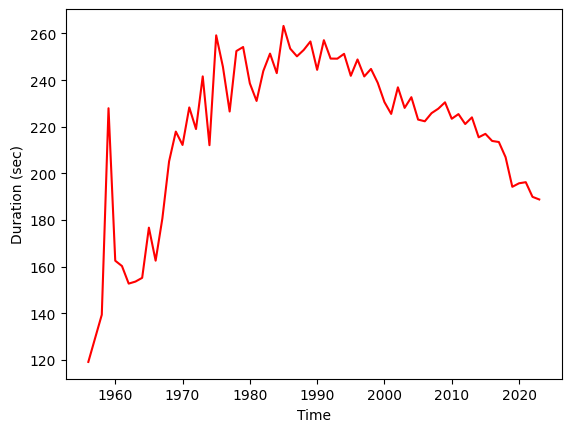

<Figure size 1000x600 with 0 Axes>

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# See evolution in time
plt.plot(plotdata['Year'], plotdata['Avg_duration_sec'], color = 'red')
plt.xlabel('Time');
plt.ylabel('Duration (sec)')
plt.figure(figsize=(10,6))
plt.show()

The plot shows that songs average lasting experienced a rapid growth from the 60's to the 80's, but since the 90's, average duration have been deacreasing at a very steady and defined rate.

### Correlation of numeric variables

In [54]:
sqlStatement_corr = """
      select `Track Duration`,
             `Popularity`,
             Danceability,
             year(`Album Release Date`) as Year,
             Energy,
             Key,
             Loudness,
             Speechiness,
             Acousticness,
             Instrumentalness,
             Liveness,
             Valence,
             Tempo
        from base_music
    """

plotcorr = spark_session.sql(sqlStatement_corr).toPandas();

<Axes: >

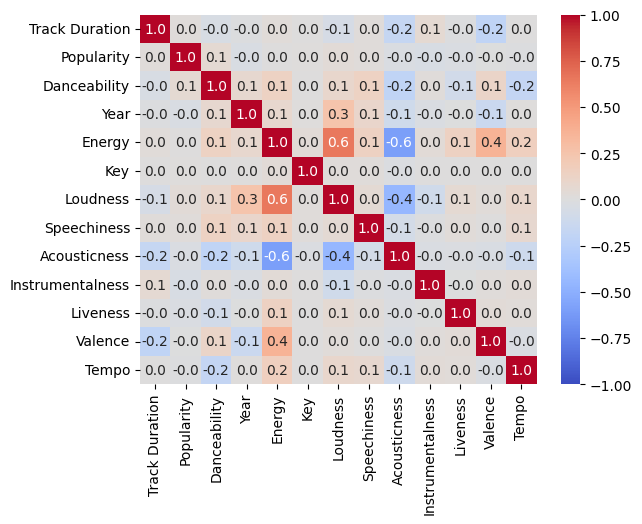

In [55]:
# Heatmap correlation of the dataset
corr = plotcorr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, 
            fmt=".1f",
            cmap=sns.color_palette("coolwarm", as_cmap=True),
            vmin = -1,
            vmax = 1)

There's very little correlation between variables in the dataset, but a few show some correlation between each other: 'Energy' vs 'Valence', 'Energy' vs 'Acousticness', 'Energy' vs 'Loudness' and 'Acousticness' vs 'Loudness'.

### Histogram of some columns. Let's see the shape of each distribution

In [56]:
# Let's see histogram for some variables

df_duration = """
      select round(`Track Duration`/1000,2) as Duration_seconds
        from base_music
    """

df_popularity = """
      select Popularity
        from base_music
    """

df_danceability = """
      select Danceability
        from base_music
    """

df_energy = """
      select Energy
        from base_music
    """

df_key = """
      select Key
        from base_music
    """

df_loudness = """
      select Loudness
        from base_music
    """

df_valence = """
      select Valence
        from base_music
    """

df_tempo = """
      select Tempo
        from base_music
    """

hist_dur = spark_session.sql(df_duration).toPandas();

hist_pop = spark_session.sql(df_popularity).toPandas();

hist_dan = spark_session.sql(df_danceability).toPandas();

hist_ene = spark_session.sql(df_energy).toPandas();

hist_key = spark_session.sql(df_key).toPandas();

hist_lou = spark_session.sql(df_loudness).toPandas();

hist_val = spark_session.sql(df_valence).toPandas();

hist_tem = spark_session.sql(df_tempo).toPandas();

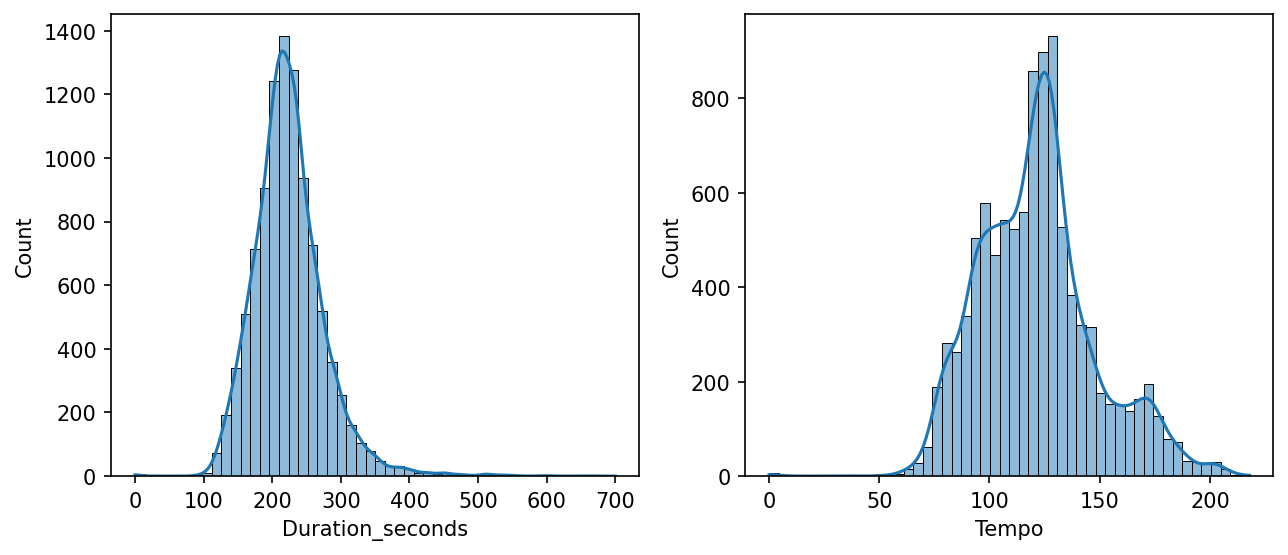

In [57]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 150

ax = [0,0]

fig, (ax[0], ax[1]) = plt.subplots(1, 2)

ax[0] = sns.histplot(
    data=hist_dur,
    x='Duration_seconds',
    bins=50,
    kde=True,
    ax=ax[0],
    binrange=(0, 0.7e3),
    kde_kws={'clip': (0, 0.7e3)}
)

ax[1] = sns.histplot(
    data=hist_tem,
    x='Tempo',
    bins=50,
    kde=True,
    ax=ax[1]
)

plt.show()

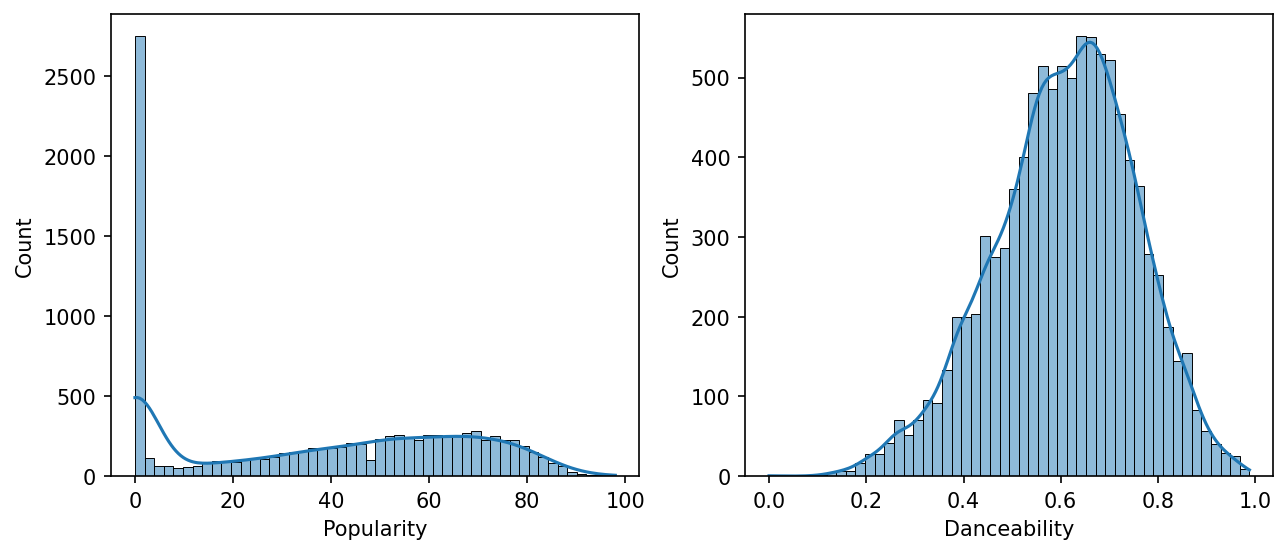

In [58]:
fig, (ax[0], ax[1]) = plt.subplots(1, 2)

ax[0] = sns.histplot(
    data=hist_pop,
    x='Popularity',
    bins=50,
    kde=True,
    ax=ax[0]
)

ax[1] = sns.histplot(
    data=hist_dan,
    x='Danceability',
    bins=50,
    kde=True,
    ax=ax[1]
)

plt.show()


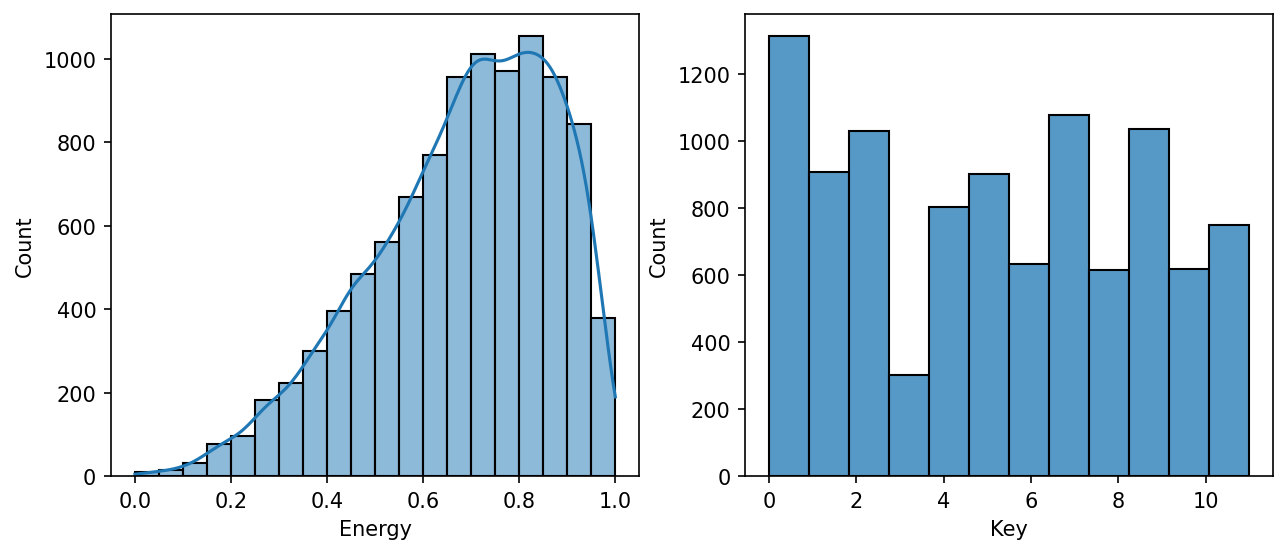

In [59]:
fig, (ax[0], ax[1]) = plt.subplots(1, 2)

ax[0] = sns.histplot(
    data=hist_ene,
    x='Energy',
    bins=20,
    kde=True,
    ax=ax[0],
    binrange=(0, 1),
    kde_kws={'clip': (0, 1)}
)

ax[1] = sns.histplot(
    data=hist_key,
    x='Key',
    bins = 12,
    ax=ax[1]
)

plt.show()

The 'key' plot shows that most used keys are C, G, A and D.

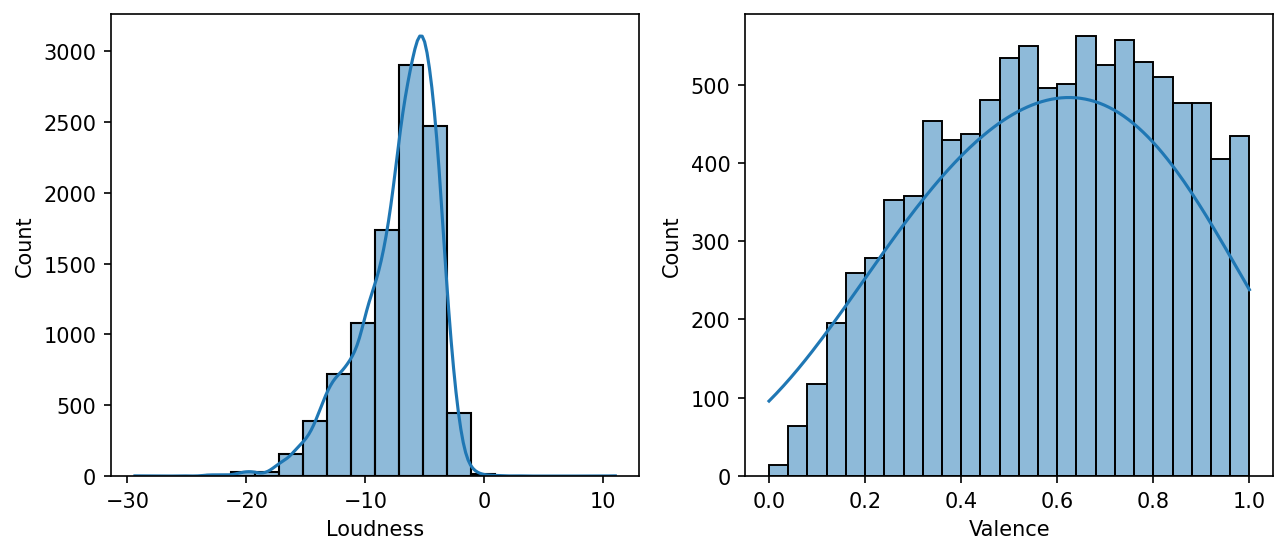

In [60]:
fig, (ax[0], ax[1]) = plt.subplots(1, 2)

ax[0] = sns.histplot(
    data=hist_lou,
    x='Loudness',
    bins=20,
    kde=True,
    ax=ax[0],
)

ax[1] = sns.histplot(
    data=hist_val,
    x='Valence',
    bins = 25,
    ax=ax[1],
    kde = True,
    binrange=(0, 1),
    kde_kws={'clip': (0, 1)}
)

In most cases, 'loudness' appears in the -6 to -4 dB range.

In [61]:
df.dtypes

[('Track Name', 'string'),
 ('Artist Name', 'string'),
 ('Album Release Date', 'timestamp'),
 ('Track Duration', 'int'),
 ('Explicit', 'boolean'),
 ('Popularity', 'int'),
 ('Artist Genres', 'string'),
 ('Danceability', 'double'),
 ('Energy', 'double'),
 ('Key', 'int'),
 ('Loudness', 'double'),
 ('Mode', 'int'),
 ('Speechiness', 'double'),
 ('Acousticness', 'double'),
 ('Instrumentalness', 'double'),
 ('Liveness', 'double'),
 ('Valence', 'double'),
 ('Tempo', 'double'),
 ('Time Signature', 'int')]

In [62]:
sqlStatement_numeric = """
      select `Track Duration`,
             Danceability,
             year(`Album Release Date`) as Year,
             Energy,
             Loudness,
             Valence,
             Tempo,
             Popularity
        from base_music
    """

pairplot = spark_session.sql(sqlStatement_numeric).toPandas();

### Pairplot before cleaning

The pairplot bellow show that the variables have little relation with each other, but 'Energy' and 'Loudness' present a somewhat linear correlation between one another.

C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


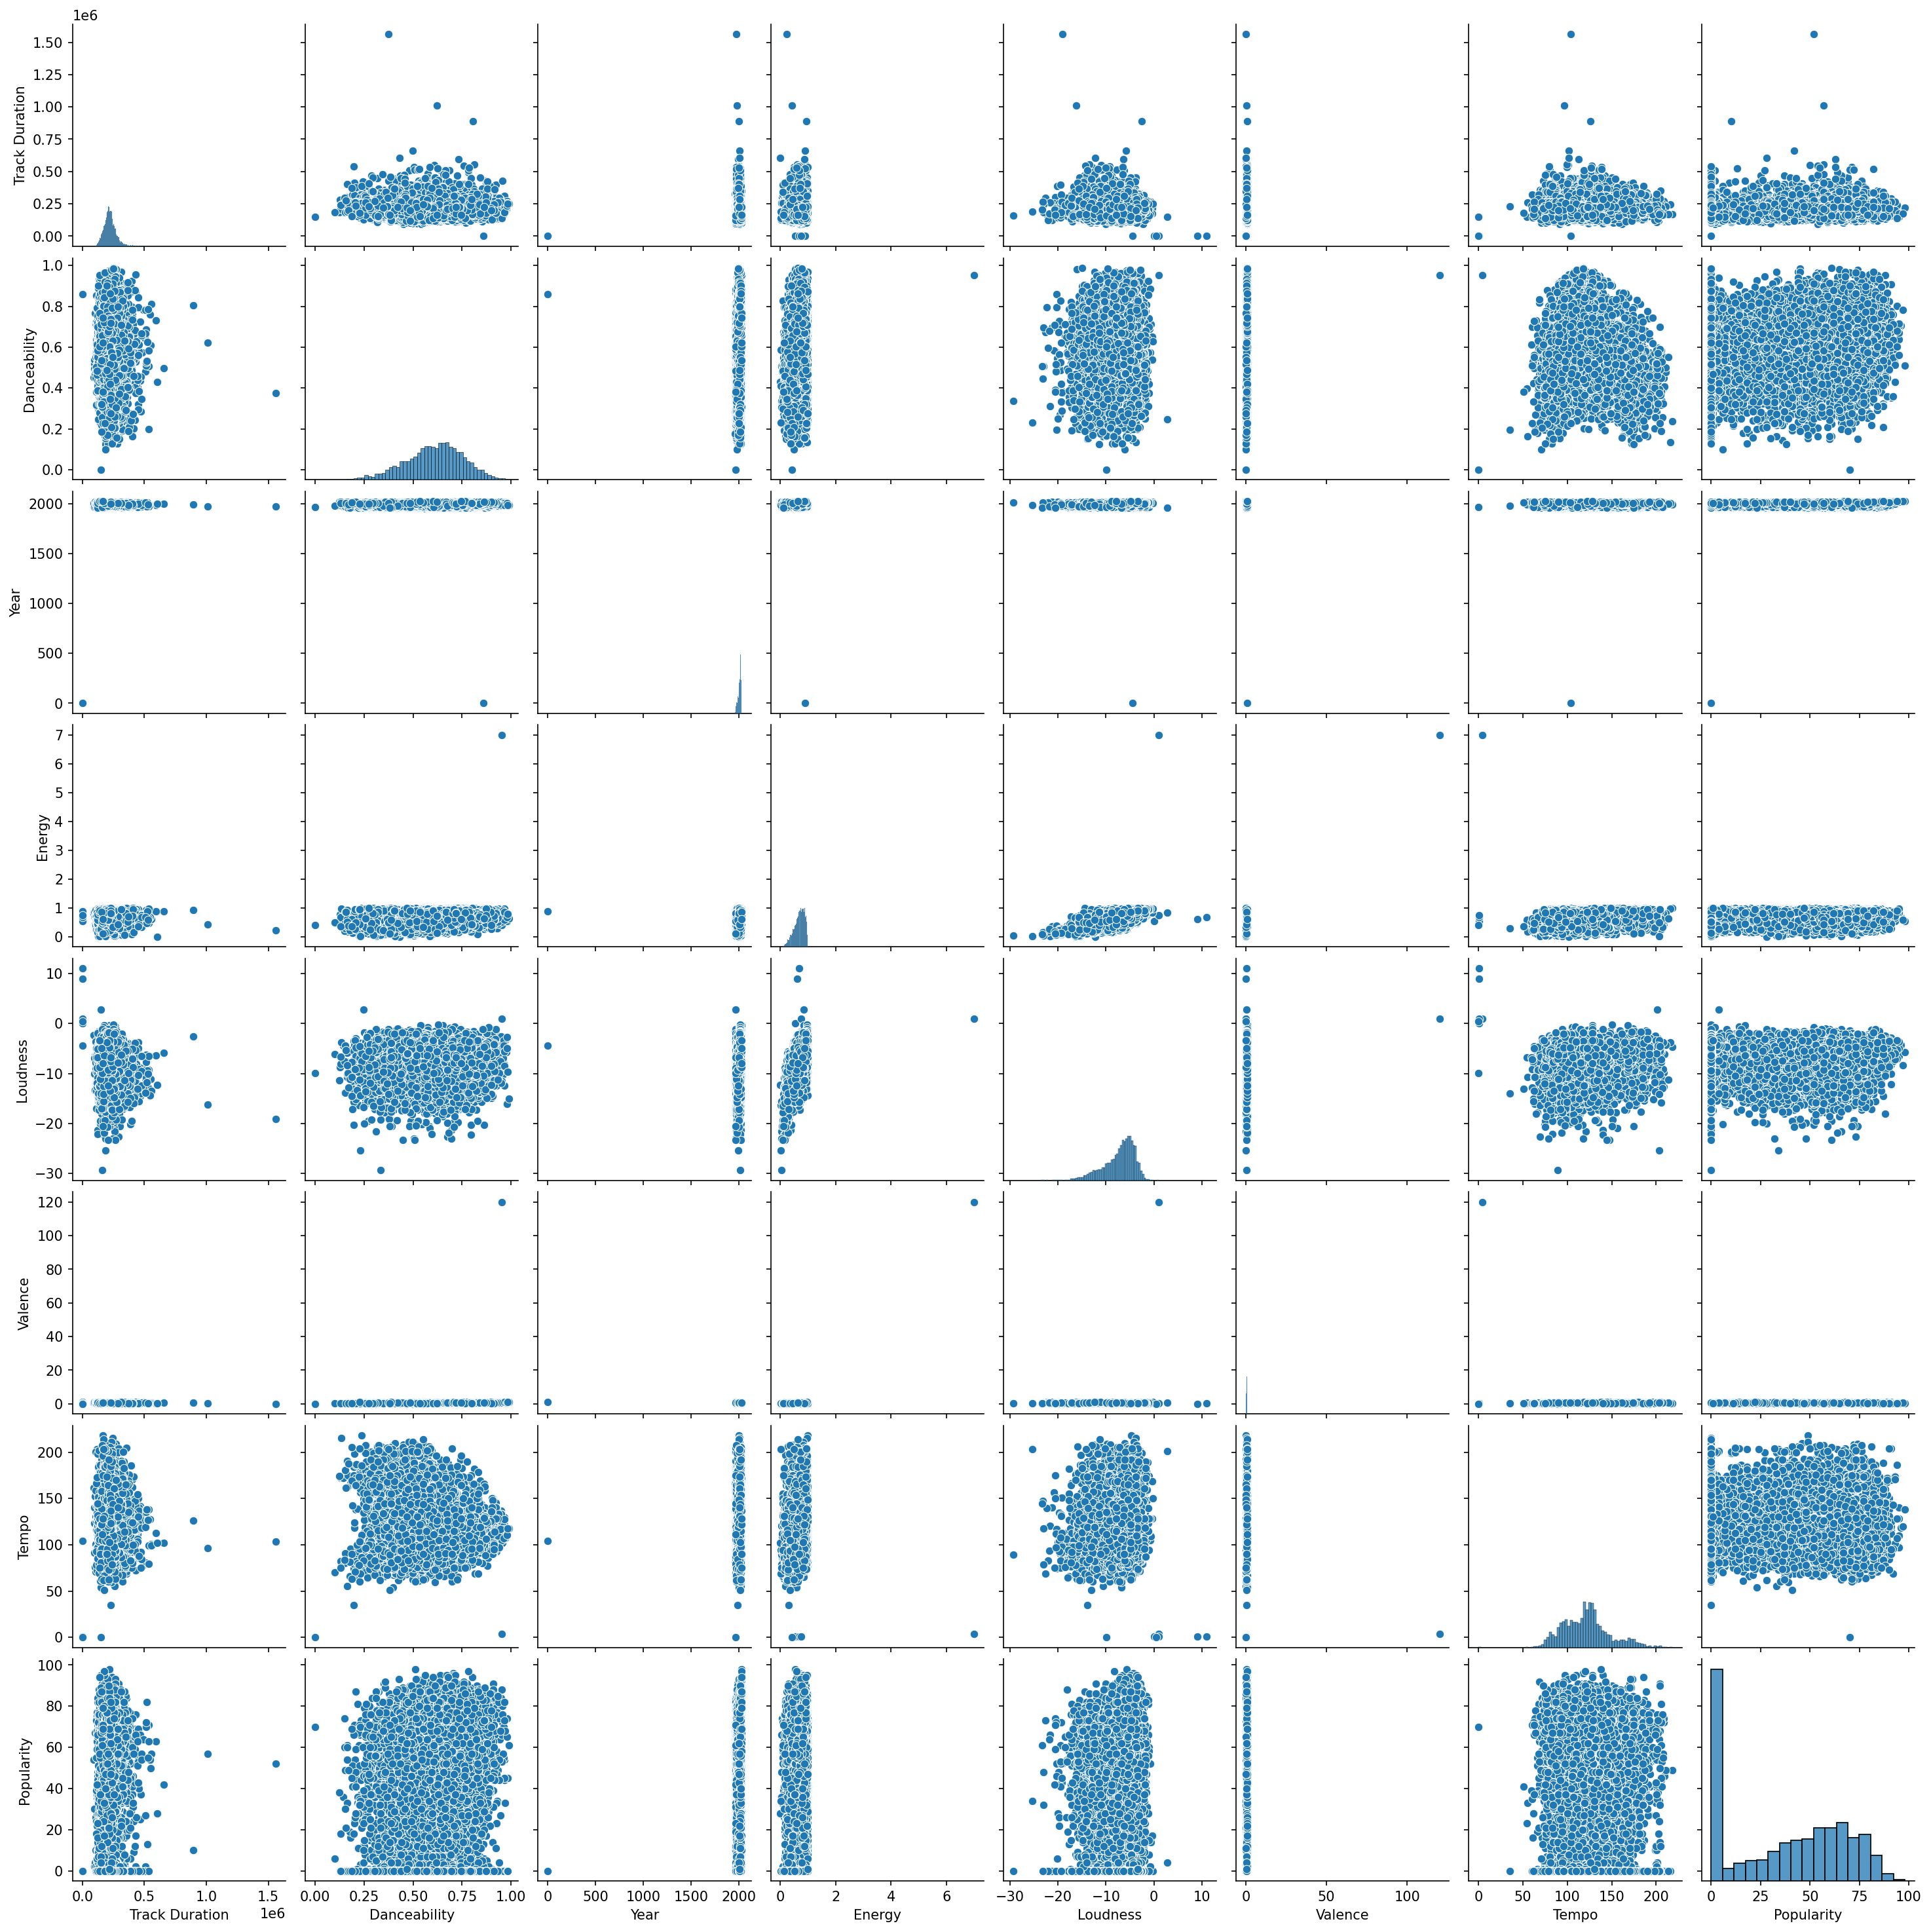

In [63]:
sns.pairplot(pairplot)

The pairplot indicates no visible relation of popularity with other variables.

In [64]:
spark_session.stop()